In [ ]:
# 다운받은 파일 삭제
!rm -rf wine*

다음 파일을 다운로드
-https://github.com/dhrim/MDC_2021/blob/master/material/deep_learning/data/wine.csv

- quality 컬럼의 최대값, 최소값을 출력
- density 컬럼을 %로 변경한 컬럼 density_percent를 생성. 소수점 1자리만 남기고.
- fixed acidity 컬럼의 상위 10%, 하위 10% 값을 출력
- 새로운 컬럼 grade를 추가. fixed acidity 상위 10% 이상은 1, 하위 10% 이하는 3, 중간은 2의 값으로.

In [ ]:
# 링크로 파일 다운로드
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/wine.csv

--2021-11-24 00:20:01--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/wine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418942 (409K) [text/plain]
Saving to: ‘wine.csv’

wine.csv            100%[===================>] 409.12K  --.-KB/s    in 0.04s   

2021-11-24 00:20:01 (11.2 MB/s) - ‘wine.csv’ saved [418942/418942]



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!head wine.csv

2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.9943200000000001,3.44,0.44,10.2,white
1,5,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.9969,3.19,0.59,9.5,red
2,5,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.9917600000000001,3.05,0.52,10.9,white
3,6,7.0,0.21,0.31,6.0,0.046,29.0,108.0,0.9939,3.26,0.5,10.8,white
4,6,7.8,0.4,0.26,9.5,0.059000000000000004,32.0,178.0,0.9955,3.04,0.43,10.9,white
5,6,6.0,0.19,0.37,9.7,0.032,17.0,50.0,0.9932,3.08,0.66,12.0,white
6,5,6.1,0.22,0.49,1.5,0.051,18.0,87.0,0.9928,3.3,0.46,9.6,white
7,6,7.1,0.38,0.42,11.8,0.040999999999999995,32.0,193.0,0.99624,3.04,0.49,10.0,white
8,5,6.8,0.24,0.31,18.3,0.046,40.0,142.0,1.0,3.3,0.41,8.7,white


In [ ]:
df = pd.read_csv('wine.csv')
df.head()

,2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


quality 컬럼의 최대값, 최소값을 출력

In [ ]:
print(np.max(df.quality))
print(np.min(df.quality))

# 같은 결과
print("quality max = ", df.quality.max())
print("quality min = ", df.quality.min())

9
3
quality max =  9
quality min =  3


density 컬럼을 %로 변경한 컬럼 density_percent를 생성. 소수점 1자리만 남기고

In [ ]:
df['density_percent'] = (df.density*1000).astype(np.int)/10
df.head()

,2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,density_percent
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,99.4
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,99.6
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,99.1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,99.3
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,99.5


In [ ]:
# 소수점 1자리수의 %로 나타내기
a = 0.12345
print(a)
print(int(a*1000))
print(int(a*1000)/10)

0.12345
123
12.3


fixed acidity 컬럼의 상위 10%, 하위 10% 값을 출력

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   2index                5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
 14  density_percent       5497 non-null   float64
dtypes: float64(12), int64

In [ ]:
# fixed acidity 가운데 스페이스바 때문에 '' 없이는 오류남
data_count = 5497
upper_index = int(5497*0.1)
lower_index = int(5497*0.9)
print(upper_index, lower_index)

549 4947


In [ ]:
# iloc를 안붙이면 원래 인덱스로 조건이 출력됨
# iloc를 붙여서 sort된 새로운 인덱스로 출력해야함
print(df['fixed acidity'].sort_values().iloc[549])
print(df['fixed acidity'].sort_values().iloc[4947])

6.0
8.7


새로운 컬럼 grade를 추가. fixed acidity 상위 10% 이상은 1, 하위 10% 이하는 3, 중간은 2의 값으로

In [ ]:
upper_value = df['fixed acidity'].sort_values().iloc[549]
lower_value = df['fixed acidity'].sort_values().iloc[4947]
print(upper_value, lower_value)

6.0 8.7


In [ ]:
1def get_grade(value):
  if value >= upper_value : return 1
  elif value < lower_value : return 3

  else: return 2

 
df['grade'] = df[['fixed acidity']].applymap(get_grade)
df.head()

,2index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,density_percent,grade
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,99.4,3
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,99.6,2
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,99.1,2
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,99.3,3
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,99.5,2


In [ ]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/titanic.csv

--2021-11-24 06:03:25--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.004s  

2021-11-24 06:03:25 (15.4 MB/s) - ‘titanic.csv’ saved [61194/61194]



- passenger Id : 컬럼 삭제
- Name : 컬럼 삭제
- Sex : Sex_로 인코딩. male:0, female:1
- Age : 평균으로 결측치 처리
- Age : 0~1 normalization
- SibSp : 컬럼 삭제
- Parch : 컬럼 삭제
- Ticket : 컬럼 삭제
- Fare : standardization
- Cabin : 컬럼 삭제 
- Embarked : 결측치 데이터 삭제
- Embarked_Encoded로 인코딩, c : 0, S : 1

In [ ]:
data = pd.read_csv('titanic.csv')
print(data)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


In [ ]:
# passenger Id : 컬럼 삭제
data.drop(columns="PassengerId", inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Name : 컬럼 삭제
data.drop(columns = "Name", inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Sex : Sex_로 인코딩. male:0, female:1
category = {"male":0, "female":1}
data["Sex_"] = data["Sex"].map(category)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_standardization,Sex_
0,0,3,male,22.0,7.2500,S,-0.774874,0
1,1,1,female,38.0,71.2833,C,1.213478,1
2,1,3,female,26.0,7.9250,S,-0.753914,1
3,1,1,female,35.0,53.1000,S,0.648853,1
4,0,3,male,35.0,8.0500,S,-0.750033,0


In [ ]:
# Age : 평균으로 결측치 처리
age_mean = data.loc[data.Age.notnull(), "Age"].mean()

data.loc[data.Age.isnull(), "Age"] = age_mean
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

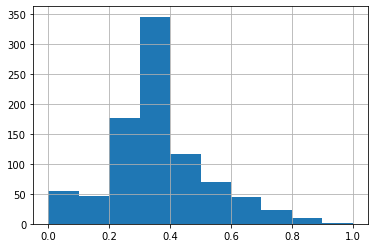

In [ ]:
# Age : 평균으로 결측치 처리. 0~1 normalization
max = data.Age.max()
min = data.Age.min()

data["Age_normalization"] = (data.Age - min) / (max - min)
data.Age_normalization.hist()

# 같은 결과
df['Age_Normalized'] = ( df.Age - df.Age.min()) / ( df.Age.max() - df.Age.min())
data.Age_Normalized.hist()

In [ ]:
# SibSp : 컬럼 삭제
data.drop(columns="SibSp",inplace=True)
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Parch, Ticket, Cabin : 컬럼 삭제
data.drop(columns=["Parch", "Ticket", "Cabin"], inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
dtype: int64

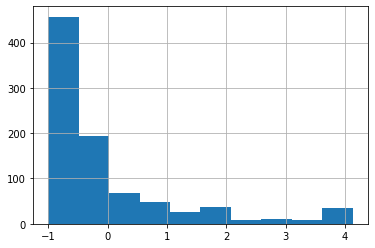

In [ ]:
# Fare : 150 넘는 값은 150으로 치환. 
data.loc[data.Fare>150, "Fare"] = 150

# 같은 결과 (후에 수정할때 좋은 코드)
FARE_MAX = 150
df['Fare_Limited'] = df.Fare
df.loc[df.Fare_Limited > FARE_MAX, 'Fare'] = FARE_MAX

# Fare의 standardization
mean = data.Fare.mean()
std = data.Fare.mean()

data["Fare_standardization"] = (data.Fare - mean) / std
data.Fare_standardization.hist()

# 같은 결과
df.Fare_Limited = ( df.Fare_Limited - df.Fare_Limited.mean() ) / df.Fare_Limited.std()

In [ ]:
# Embarked : 결측치 데이터 삭제
data.drop(data.loc[data.Embarked.isnull()].index, inplace=True)
data.isnull().sum()

# 같은 결과 (단, 열 특정 안한 상태)
df.dropna(inplace=True)

Survived                0
Pclass                  0
Sex                     0
Age                     0
Fare                    0
Embarked                0
Fare_standardization    0
Sex_                    0
dtype: int64

In [ ]:
# Embarked_Code로 인코딩, c : 0, S : 1
cate = {"C":0,"S":1,"Q":3}
data["Embarked_Code"] = data["Embarked"].map(cate)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_standardization,Sex_,Embarked_Code
0,0,3,male,22.0,7.2500,S,-0.752134,0,1
1,1,1,female,38.0,71.2833,C,1.437063,1,0
2,1,3,female,26.0,7.9250,S,-0.729057,1,1
3,1,1,female,35.0,53.1000,S,0.815405,1,1
4,0,3,male,35.0,8.0500,S,-0.724783,0,1


array(['S', 'C', 'Q'], dtype=object)

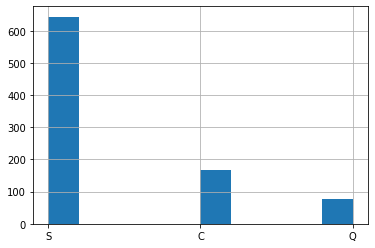

In [ ]:
# 컬럼 안에 들어있는 데이터의 종류 확인하기
data.Embarked.hist()

In [ ]:
# 같은 결과
data.Embarked.astype('category')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: category
Categories (3, object): ['C', 'Q', 'S']

In [ ]:
# 같은 결과
data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)